In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

## A. Fixed Point Iteration

### Fixed Point Theorem

1. Fixed point is a point x for which F(x) = x

2. If there exist an interal $[a,b]$ such that y(x) and x $\in [a,b]$, then f(x) has a fixed point in $[a,b]$

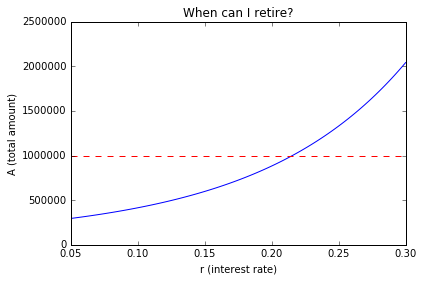

In [26]:
def find_amt(P,r,m,n):
    return P / r * float(m) * ((1.0 + r/float(m))**(float(m)*n)-1.0)
    #return P / (r / float(m)) * ( (1.0 + r / float(m))**(float(m) * n) - 1.0)

P = 1500.
m = 12
n = 20.0
goal = 1e6

r = numpy.linspace(0.05,0.3,100)

fig = plt.figure()
axes=fig.add_subplot(1,1,1)

axes.plot(r,find_amt(P,r,m,m))
axes.plot(r,numpy.ones(r.shape)*goal,'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("A (total amount)")
axes.set_title("When can I retire?")
axes.ticklabel_format(axis = 'y',style = 'sci',scilimits=(-1,1))

Example 1:

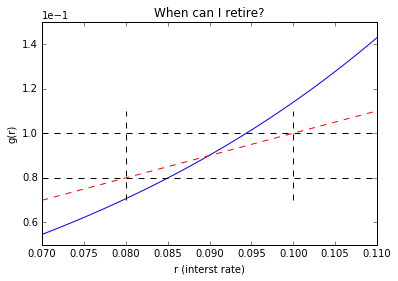

In [63]:
def g(P,A,m,n,r):
    return P * float(m) / A * ((1.0 + r/float(m))**(float(m)*n)-1.0)

P = 1500.
m = 12
n = 20.0
A = 1e6

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
r = numpy.linspace(0.07,0.11,100)
axes.plot(r,g(P,A,m,n,r))
axes.plot(r,r,"r--")
axes.set_xlabel("r (interst rate)")
axes.set_ylabel("g(r)")
axes.set_title("When can I retire?")
axes.ticklabel_format(axis = 'y',style = 'sci',scilimits = (-1,1))

fix = [0.08,0.1]
#Add grids to specify the space of [a,b]
axes.plot(numpy.ones(r.shape)*fix[0],r,'--k')
axes.plot(numpy.ones(r.shape)*fix[1],r,'--k')
axes.plot(r,numpy.ones(r.shape)*fix[0],'--k')
axes.plot(r,numpy.ones(r.shape)*fix[1],'--k')

plt.show()

In [45]:
r = 0.09
for steps in xrange(1,10):
    print "r = ",r
    print "Difference =",g(P,A,m,n,r)-r
    print
    r = g(P,A,m,n,r)


r =  0.09
Difference = 0.000164727440507

r =  0.0901647274405
Difference = 0.000354277734037

r =  0.0905190051745
Difference = 0.000765861661241

r =  0.0912848668358
Difference = 0.00167404901814

r =  0.0929589158539
Difference = 0.00374864222552

r =  0.0967075580794
Difference = 0.00885788434491

r =  0.105565442424
Difference = 0.0237311213235

r =  0.129296563748
Difference = 0.088382496983

r =  0.217679060731
Difference = 1.11038120422



Exapmple 2: $f(x) = e^x$, find the fixed point of $f(x)$

In [49]:
x = 0.4
for steps in xrange(1,4):
    print "x = ",x
    print "Residual = ",numpy.exp(-x)-x
    print
    x = numpy.exp(-x)

x =  0.4
Residual =  0.270320046036

x =  0.670320046036
Residual =  -0.158775212347

x =  0.511544833689
Residual =  0.0880237954988



Add some plot skills...

0.433422126873


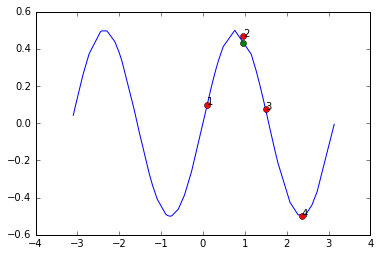

In [2]:
#Inspiration from hw2
def linear_eval(t, y, t_star):
    
    # INSERT CODE HERE
    #raise NotImplementedError("Replace this statement with your solution.")
    if numpy.size(t_star) == 1:
        t_star = [t_star]
    y_star = numpy.array(t_star)
    for n in xrange(0,numpy.size(t_star)):
        if t_star[n] < t[0]:
            y_star[n] = y[0]
        if t_star[n] > t[numpy.size(t)-1]:
            y_star[n] = y[numpy.size(t)-1]
        for m in xrange(0,numpy.size(t)-1):            
            if t_star[n] == t[m]:
                y_star[n] = y[m]
            if (t_star[n] > t[m] and t_star[n] < t[m+1]):
                y_star[n] = y[m] + (t_star[n]-t[m])*(y[m+1]-y[m])/(t[m+1]-t[m])

    if numpy.size(y_star) == 1:
        return y_star[0]
    else:
        return y_star


phi = (numpy.sqrt(5.0) - 1.0) / 2.0
bracket = [0.1, 3.0 * numpy.pi / 4.0]

N = 50
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi) - numpy.pi
t.sort()
y = numpy.sin(t) * numpy.cos(t)
plt.plot(t,y)

x = [bracket[0], None, None, bracket[1]]
x[1] = x[3] - phi * (x[3] - x[0])
x[2] = x[0] + phi * (x[3] - x[0])
for n in xrange(0,numpy.size(x)):
    plt.plot(x[n], numpy.sin(x[n]) * numpy.cos(x[n]),'ro')
    plt.text(x[n],numpy.sin(x[n]) * numpy.cos(x[n]),str(n+1))
    
answer = linear_eval(t, y, x[1])
print answer
plt.plot(x[1],answer,'go')